# Analisis de datos cuantitativos en python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [5]:
planetas = sb.load_dataset('planets')
planetas.shape

(1035, 6)

In [6]:
planetas.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Es importante mencionar que para poder evaluar todos nuestros datos es necesarion que no haya valores Na en caso de existir lo eliminamos con la funcion ``dropna()``, para que asi la informacion pueda estar completa


In [7]:
planetas.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [8]:
planetas.distance.sum()

213367.98000000004

In [9]:
planetas.distance.prod()

inf

## Desviacion Media Absoluta

$\frac{\sum_{i=1}^n |x_i -\bar{x}|}{n}$

In [10]:
planetas.distance.mad()

318.100885452407

In [11]:
planetas.distance.var()

537459.7922212934

In [12]:
planetas.distance.std()

733.1164929404422

In [13]:
planetas.distance.min()

1.35

In [14]:
planetas.distance.max()

8500.0

In [15]:
planetas.groupby('method').sum()

In [16]:
planetas.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [17]:
for (method,group) in planetas.groupby('method'):
    print("{0:30s} forma ={1}".format(method,group.shape))

Astrometry                     forma =(2, 6)
Eclipse Timing Variations      forma =(9, 6)
Imaging                        forma =(38, 6)
Microlensing                   forma =(23, 6)
Orbital Brightness Modulation  forma =(3, 6)
Pulsar Timing                  forma =(5, 6)
Pulsation Timing Variations    forma =(1, 6)
Radial Velocity                forma =(553, 6)
Transit                        forma =(397, 6)
Transit Timing Variations      forma =(4, 6)


Tambien podemos hacer un ``describe`` de cierta parte de nuestro data set por ejemplo si queremos saber que metodos son utilizados al paso de los años ,realizamos lo siguiente:

In [18]:
 planetas.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


 Podemos observar que el metodo para el calculo de la informacion de los planetas es "Transit" o "Transit Timing Variations" en el año 2014 mientras que el mas antiguo es el metodo "Pulsar Timing" del año 1992.
 
Si queremos clasfificar los planetas decubiertos por metodo y decada de descubrimiento podmos hacer lo siguiente:


In [19]:
#Redondeamos el año para que nos quede mejor presentacion.
decada = 10*planetas['year']//10
#Convertimos a string y le agregamos una s para que tenga mejor formato
decada = decada.astype(str)+"s"
#Agregamos una columna adicional al df
decada.name = "decada"

In [22]:
planetas.groupby(["method",decada])['number'].sum().unstack().fillna(0)

decada,1989s,1992s,1994s,1995s,1996s,1997s,1998s,1999s,2000s,2001s,...,2005s,2006s,2007s,2008s,2009s,2010s,2011s,2012s,2013s,2014s
method,,,,,,,,,,,,,,,,,,,,,
Astrometry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Eclipse Timing Variations,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,4.0,5.0,1.0,0.0,0.0
Imaging,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.0,17.0,3.0,9.0,3.0,2.0,7.0,0.0
Microlensing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,6.0,2.0,2.0,1.0,8.0,4.0,0.0
Orbital Brightness Modulation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0
Pulsar Timing,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Pulsation Timing Variations,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Radial Velocity,1.0,0.0,0.0,1.0,15.0,1.0,11.0,24.0,27.0,15.0,...,61.0,33.0,47.0,76.0,105.0,92.0,176.0,70.0,65.0,21.0
Transit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,16.0,17.0,20.0,85.0,162.0,175.0,197.0,93.0


{'whiskers': [<matplotlib.lines.Line2D at 0x123693f60>,
 'caps': [<matplotlib.lines.Line2D at 0x1236a16a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x123693b38>],
 'medians': [<matplotlib.lines.Line2D at 0x1236a1d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1236a1e10>],
 'means': []}

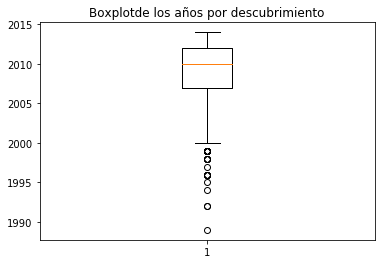

In [34]:
fig1,ax1 = plt.subplots()
pink_square = dict(markerfacecolor="pink",marker="s")
fig5,ax5 = plt.subplots()
ax5.set_title("Boxplot personalizado")
ax5.boxplot(data,vert=False,flierprops = pink_square,whis=1.7)


{'whiskers': [<matplotlib.lines.Line2D at 0x123fa09b0>,
 'caps': [<matplotlib.lines.Line2D at 0x123fa0e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x123fa0588>],
 'medians': [<matplotlib.lines.Line2D at 0x123fad780>],
 'fliers': [<matplotlib.lines.Line2D at 0x123fadac8>],
 'means': []}

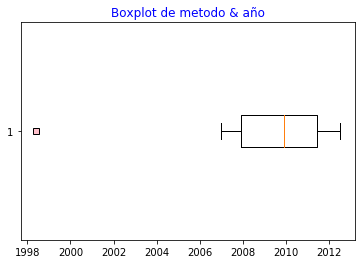

In [62]:
info = planetas.groupby('method')['year'].mean()


pink_square = dict(markerfacecolor="pink",marker="s")
fig1,ax1 = plt.subplots()
ax1.set_title("Boxplot de metodo & año",color = "blue")

ax1.boxplot(info
            ,vert=False,flierprops = pink_square,whis=1.7)